In [294]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [295]:
# Provide the file path to your local dataset
file_path = "/Users/mavingill/Downloads/Greece_Travel_Data/travel_tourism_dataset.csv"

# Load the dataset from the specified file
greece_travel_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
greece_travel_data.head()

,Trip #no.,Duration,Cost of Travel(Entire Trip),Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Date of Travel
0,55,1,20111,Flight,Hotel,Cristina,Fuentes,6/14/14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,9/13/22
1,288,5,29681,Car,Hotel,Patricia,Young,9/25/23,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,9/4/21
2,291,7,24950,Flight,Airbnb,Christina,Kirby,1/2/35,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,1/25/21
3,131,19,18676,Roadtrip,Airbnb,Michael,Hudson,4/21/82,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,1/28/22
4,281,28,18899,Flight,Airbnb,Francisco,Hensley,6/29/13,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,10/21/21


In [296]:
# Convert 'Date of Travel' column to datetime format
greece_travel_data['Date of Travel'] = pd.to_datetime(greece_travel_data['Date of Travel'])

# Split the date column into year, month, and day columns
greece_travel_data['Year'] = greece_travel_data['Date of Travel'].dt.year
greece_travel_data['Month'] = greece_travel_data['Date of Travel'].dt.month
greece_travel_data['Day'] = greece_travel_data['Date of Travel'].dt.day


# Drop columns 'Trip #no.' and 'Date of Travel' from the DataFrame
cleaned_df = greece_travel_data.drop(['Trip #no.', 'Date of Travel'], axis=1)

# Rename the 'Cost of Travel(Entire Trip)' to 'Cost of Travel(Entire Trip) in Euros'
cleaned_df = cleaned_df.rename(columns={'Cost of Travel(Entire Trip)': 'Cost of Travel(Entire Trip) in Euros'})

# Display the modified DataFrame
cleaned_df.head()

/var/folders/_8/6yz20cqn3h916cl84cktrsn40000gn/T/ipykernel_78604/3468884537.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  greece_travel_data['Date of Travel'] = pd.to_datetime(greece_travel_data['Date of Travel'])


,Duration,Cost of Travel(Entire Trip) in Euros,Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Year,Month,Day
0,1,20111,Flight,Hotel,Cristina,Fuentes,6/14/14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,2022,9,13
1,5,29681,Car,Hotel,Patricia,Young,9/25/23,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,2021,9,4
2,7,24950,Flight,Airbnb,Christina,Kirby,1/2/35,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,2021,1,25
3,19,18676,Roadtrip,Airbnb,Michael,Hudson,4/21/82,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,2022,1,28
4,28,18899,Flight,Airbnb,Francisco,Hensley,6/29/13,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,2021,10,21


In [297]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = greece_travel_data['Stay']

# Separate the X variable, the features
X = greece_travel_data.drop("Stay", axis=1)

In [298]:
# Review the y variable Series
y[:5]

0     Hotel
1     Hotel
2    Airbnb
3    Airbnb
4    Airbnb
Name: Stay, dtype: object

In [299]:
# Review the X variable DataFrame
X.head()

,Trip #no.,Duration,Cost of Travel(Entire Trip),Mode of Travel,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Date of Travel,Year,Month,Day
0,55,1,20111,Flight,Cristina,Fuentes,6/14/14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,2022-09-13,2022,9,13
1,288,5,29681,Car,Patricia,Young,9/25/23,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,2021-09-04,2021,9,4
2,291,7,24950,Flight,Christina,Kirby,1/2/35,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,2021-01-25,2021,1,25
3,131,19,18676,Roadtrip,Michael,Hudson,4/21/82,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,2022-01-28,2022,1,28
4,281,28,18899,Flight,Francisco,Hensley,6/29/13,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,2021-10-21,2021,10,21


In [300]:
# Check the balance of our target values
y.value_counts()

Stay
Other      787
Airbnb     786
Hotel      724
Resorts    703
Name: count, dtype: int64

In [301]:
# Combine X_train and X_test into a single dataset
X_combined = pd.concat([X_train, X_test])

# Initialize the OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

# Fit the encoder on your combined data and transform both the training and test data
X_encoded = encoder.fit_transform(X_combined)

# Split the encoded data back into X_train_encoded and X_test_encoded
X_train_encoded = X_encoded[:len(X_train)]
X_test_encoded = X_encoded[len(X_train):]

# Get the feature names from the encoder
feature_names = encoder.get_feature_names_out(input_features=X_combined.columns)

# Create DataFrames from the encoded arrays and assign column names
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names)

/Users/mavingill/Applications/anaconda3/envs/Env_2/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [305]:
# Check if 'Date of Travel' column exists in X_train
if 'Date of Travel' in X_train_encoded_df.columns:
    X_train_encoded_df['Year'] = X_train_encoded_df['Date of Travel'].dt.year
    X_train_encoded_df['Month'] = X_train_encoded_df['Date of Travel'].dt.month
    X_train_encoded_df['Day'] = X_train_encoded_df['Date of Travel'].dt.day
    X_train_encoded_df = X_train_encoded_df.drop('Date of Travel', axis=1)

# Check if 'Date of Travel' column exists in X_test
if 'Date of Travel' in X_test_encoded_df.columns:
    X_test_encoded_df['Year'] = X_test_encoded_df['Date of Travel'].dt.year
    X_test_encoded_df['Month'] = X_test_encoded_df['Date of Travel'].dt.month
    X_test_encoded_df['Day'] = X_test_encoded_df['Date of Travel'].dt.day
    X_test_encoded_df = X_test_encoded_df.drop('Date of Travel', axis=1)

In [306]:
print(X_train_encoded_df.columns)

Index(['Trip #no._2', 'Trip #no._3', 'Trip #no._4', 'Trip #no._5',
       'Trip #no._6', 'Trip #no._7', 'Trip #no._8', 'Trip #no._9',
       'Trip #no._10', 'Trip #no._11',
       ...
       'Address_Unit 6964 Box 2307\nDPO AA 42980_True',
       'Address_Unit 6964 Box 2307\nDPO AA 42980_nan',
       'Address_Unit 7182 Box 6902\nDPO AA 28882_True',
       'Address_Unit 7182 Box 6902\nDPO AA 28882_nan',
       'Address_Unit 7275 Box 1868\nDPO AE 80072_True',
       'Address_Unit 7275 Box 1868\nDPO AE 80072_nan',
       'Address_Unit 7957 Box 3060\nDPO AA 26723_True',
       'Address_Unit 7957 Box 3060\nDPO AA 26723_nan',
       'Address_Unit 9803 Box 4160\nDPO AP 93165_True',
       'Address_Unit 9803 Box 4160\nDPO AP 93165_nan'],
      dtype='object', length=18519)


In [307]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [308]:
datetime_columns = X_train_encoded_df.select_dtypes(include=['datetime64']).columns
print("Datetime columns in X_train:", datetime_columns)

Datetime columns in X_train: Index([], dtype='object')


In [309]:
X_train_encoded_df = X_train_encoded_df.apply(pd.to_numeric, errors='coerce')
X_test_encoded_df = X_test_encoded_df.apply(pd.to_numeric, errors='coerce')

In [310]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [311]:
print("Data Type of y_train:", y_train.dtype)
print("Data Type of y_test:", y_test.dtype)

Data Type of y_train: int64
Data Type of y_test: int64


In [313]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, random_state=1, stratify=y)

In [315]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 and increase max_iter
classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)

# Fit the model using training data
classifier.fit(X_train_encoded, y_train)

/Users/mavingill/Applications/anaconda3/envs/Env_2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=1)

In [322]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test_encoded)
pd.DataFrame({"Predictions": predictions,"Acutal": y_test})

,Predictions,Acutal
2092,Hotel,Resorts
2153,Hotel,Other
1121,Hotel,Other
1771,Other,Other
2071,Airbnb,Other
...,...,...
1255,Resorts,Other
2635,Airbnb,Hotel
2328,Airbnb,Other
2732,Other,Airbnb


In [323]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)

0.27493431363257315

In [324]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)

array([[59, 51, 49, 37],
       [46, 45, 50, 40],
       [50, 48, 58, 41],
       [42, 42, 47, 45]])

In [325]:
# Print the classification report for the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Airbnb       0.30      0.30      0.30       196
       Hotel       0.24      0.25      0.25       181
       Other       0.28      0.29      0.29       197
     Resorts       0.28      0.26      0.27       176

    accuracy                           0.28       750
   macro avg       0.28      0.27      0.28       750
weighted avg       0.28      0.28      0.28       750



In [326]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 and increase max_iter
classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=750)

# Fit the model using training data
classifier.fit(X_train_encoded, y_train)

/Users/mavingill/Applications/anaconda3/envs/Env_2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=750, random_state=1)

In [327]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test_encoded)
pd.DataFrame({"Predictions": predictions,"Acutal": y_test})

,Predictions,Acutal
2092,Hotel,Resorts
2153,Hotel,Other
1121,Hotel,Other
1771,Other,Other
2071,Airbnb,Other
...,...,...
1255,Resorts,Other
2635,Airbnb,Hotel
2328,Airbnb,Other
2732,Other,Airbnb


In [328]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)

0.27620982383665477

In [329]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)

array([[60, 51, 48, 37],
       [45, 45, 51, 40],
       [51, 48, 58, 40],
       [42, 42, 47, 45]])

In [330]:
# Print the classification report for the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Airbnb       0.30      0.31      0.30       196
       Hotel       0.24      0.25      0.25       181
       Other       0.28      0.29      0.29       197
     Resorts       0.28      0.26      0.27       176

    accuracy                           0.28       750
   macro avg       0.28      0.28      0.28       750
weighted avg       0.28      0.28      0.28       750



In [331]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 and increase max_iter
classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1500)

# Fit the model using training data
classifier.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1500, random_state=1)

In [332]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test_encoded)
pd.DataFrame({"Predictions": predictions,"Acutal": y_test})

,Predictions,Acutal
2092,Hotel,Resorts
2153,Hotel,Other
1121,Hotel,Other
1771,Other,Other
2071,Airbnb,Other
...,...,...
1255,Resorts,Other
2635,Airbnb,Hotel
2328,Airbnb,Other
2732,Other,Airbnb


In [333]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)

0.2736652780995782

In [334]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)

array([[59, 51, 49, 37],
       [46, 45, 50, 40],
       [50, 48, 57, 42],
       [42, 42, 47, 45]])

In [335]:
# Print the classification report for the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Airbnb       0.30      0.30      0.30       196
       Hotel       0.24      0.25      0.25       181
       Other       0.28      0.29      0.28       197
     Resorts       0.27      0.26      0.26       176

    accuracy                           0.27       750
   macro avg       0.27      0.27      0.27       750
weighted avg       0.27      0.27      0.27       750



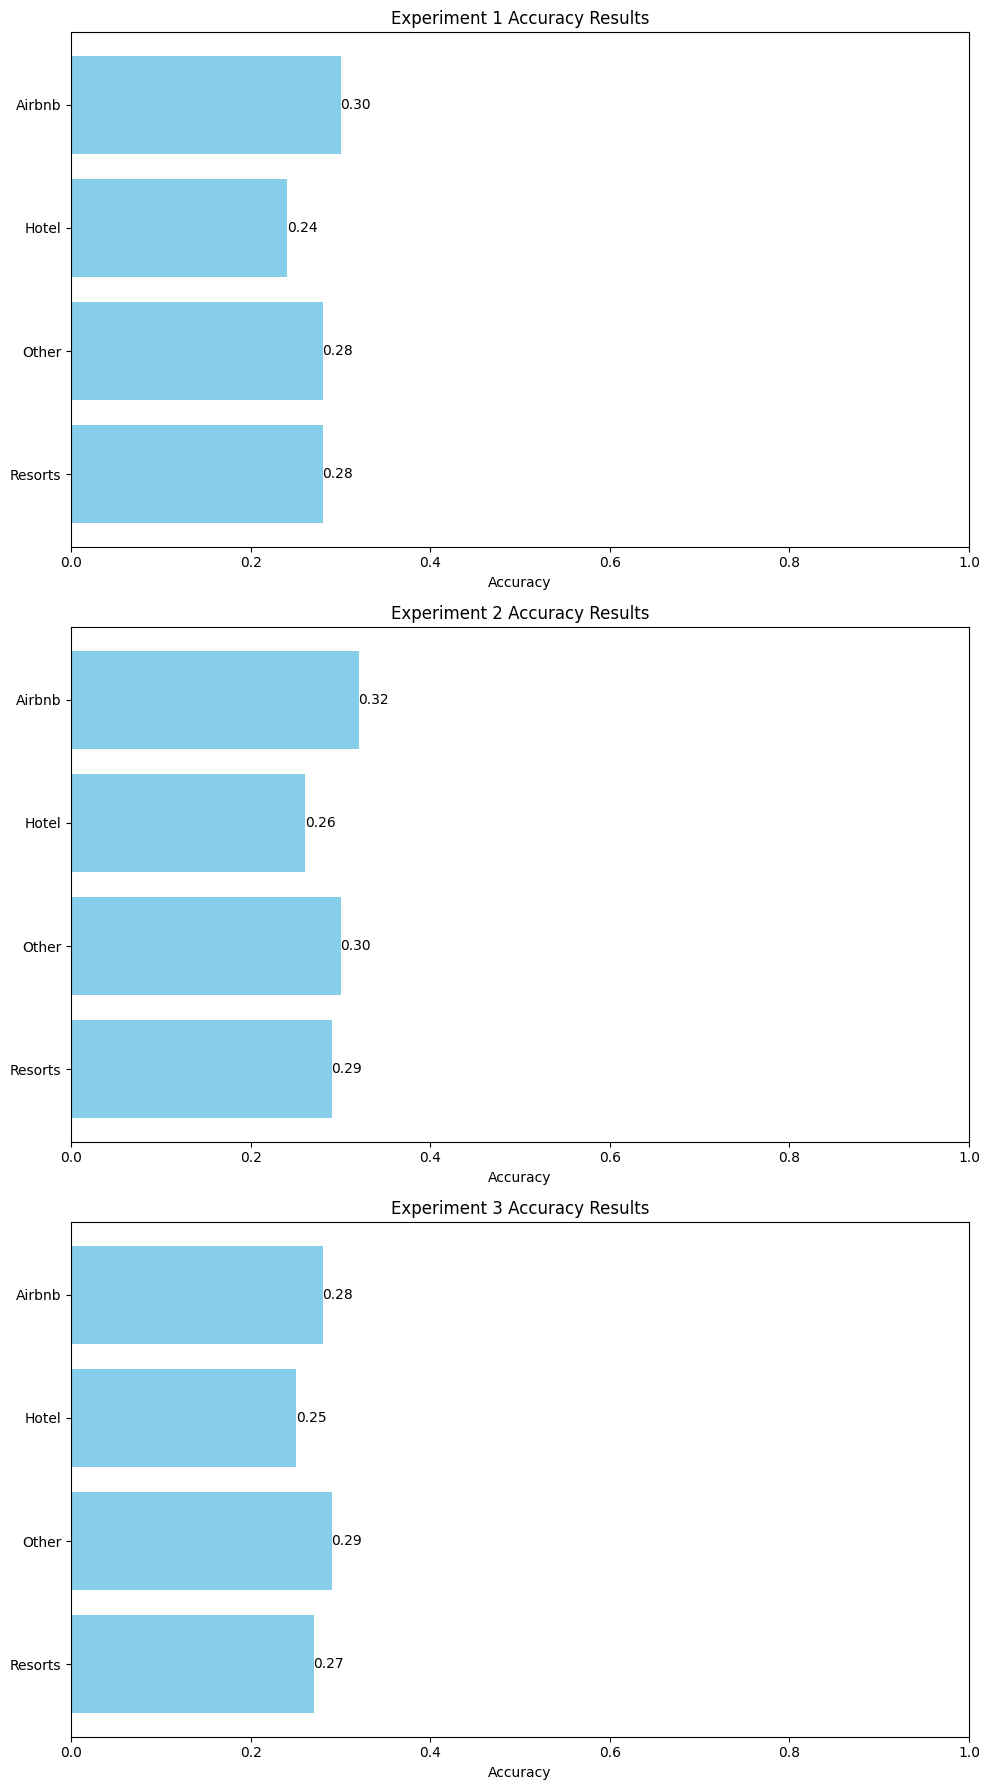

In [340]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these lists with your accuracy scores and labels for each experiment
accuracies_experiment_1 = [0.30, 0.24, 0.28, 0.28]
accuracies_experiment_2 = [0.32, 0.26, 0.30, 0.29]
accuracies_experiment_3 = [0.28, 0.25, 0.29, 0.27]

# Labels for each experiment
experiment_labels = ['Experiment 1', 'Experiment 2', 'Experiment 3']

class_labels = ['Airbnb', 'Hotel', 'Other', 'Resorts']
n_class = len(class_labels)

fig, axes = plt.subplots(nrows=len(experiment_labels), figsize=(10, 6 * len(experiment_labels)))

for i, accuracies in enumerate([accuracies_experiment_1, accuracies_experiment_2, accuracies_experiment_3]):
    ax = axes[i]
    y_pos = np.arange(n_class)
    ax.barh(y_pos, accuracies, color='skyblue')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(class_labels)
    ax.invert_yaxis()  # Invert the order to have 'Airbnb' at the top
    ax.set_xlabel('Accuracy')
    ax.set_title(f'{experiment_labels[i]} Accuracy Results')
    ax.set_xlim(0, 1)  # Set the x-axis limits (from 0 to 1 for accuracy)

    # Show the accuracy values on the bars
    for j, v in enumerate(accuracies):
        ax.text(v, j, f'{v:.2f}', color='black', va='center')

plt.tight_layout()
plt.show()

In [316]:
# Check the data type of the target variable (y_train)
print("Data Type of y_train:", y_train.dtypes)

# Check the data types of the columns in X_train
print("Data Types of X_train Columns:")
print(X_train.dtypes)

Data Type of y_train: object
Data Types of X_train Columns:
Trip #no.                        int64
Duration                         int64
Cost of Travel(Entire Trip)      int64
Age                              int64
Year                             int32
                                 ...  
Nationality_Wallis and Futuna     bool
Nationality_Western Sahara        bool
Nationality_Yemen                 bool
Nationality_Zambia                bool
Nationality_Zimbabwe              bool
Length: 5916, dtype: object


In [317]:
print("Data Type of y_train:", y_train.dtypes)
print("Data Type of y_test:", y_test.dtypes)

Data Type of y_train: object
Data Type of y_test: object


In [318]:
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())

Unique values in y_train: ['Airbnb' 'Other' 'Resorts' 'Hotel']
Unique values in y_test: ['Resorts' 'Other' 'Hotel' 'Airbnb']


In [319]:
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())

Missing values in y_train: 0
Missing values in y_test: 0


In [320]:
# Check the data types of the columns in X_train
print("Data Types of X_train Columns:")
print(X_train.dtypes)

# Check the data types of the columns in X_test
print("Data Types of X_test Columns:")
print(X_test.dtypes)

Data Types of X_train Columns:
Trip #no.                        int64
Duration                         int64
Cost of Travel(Entire Trip)      int64
Age                              int64
Year                             int32
                                 ...  
Nationality_Wallis and Futuna     bool
Nationality_Western Sahara        bool
Nationality_Yemen                 bool
Nationality_Zambia                bool
Nationality_Zimbabwe              bool
Length: 5916, dtype: object
Data Types of X_test Columns:
Trip #no.                        int64
Duration                         int64
Cost of Travel(Entire Trip)      int64
Age                              int64
Year                             int32
                                 ...  
Nationality_Vietnam               bool
Nationality_Wallis and Futuna     bool
Nationality_Western Sahara        bool
Nationality_Zambia                bool
Nationality_Zimbabwe              bool
Length: 2467, dtype: object


In [321]:
# Count the number of non-numeric columns in X_train
non_numeric_columns_train = X_train.select_dtypes(exclude=['int', 'float', 'bool']).columns
print("Non-Numeric Columns in X_train:")
print(non_numeric_columns_train)

# Count the number of non-numeric columns in X_test
non_numeric_columns_test = X_test.select_dtypes(exclude=['int', 'float', 'bool']).columns
print("Non-Numeric Columns in X_test:")
print(non_numeric_columns_test)

Non-Numeric Columns in X_train:
Index([], dtype='object')
Non-Numeric Columns in X_test:
Index([], dtype='object')
